In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###Activation Functions

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def d_sigmoid(x):
  return (1 - sigmoid(x)) * sigmoid(x)

def tanh(x):
  return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def relu(x):
  return np.where(np.asarray(x) > 0, x, 0)

def d_relu(x):
    return np.where(x <= 0, 0, 1)

def softmax(x):
    e_x = np.exp(x)
    return e_x/e_x.sum()

###Cost Function:

In [ ]:
def cross_entropy_loss(y, y_hat, i):
  return -np.log(y_hat[y[i]][0])

In [ ]:
def cost(y, y_hat, i):
  
  m = y.shape[0]
  c = (1/m) * np.sum(cross_entropy_loss(y, y_hat))
  c = np.squeeze(c) 

  return c

###Layer Class : parameters initialization for each layer

In [ ]:
class Layer:

    activationFunc = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid),
        'relu' : (relu, d_relu),
        'softmax' : (softmax, None)
    }

    def __init__(self, inputs, neurons, activation):
        np.random.seed(44)
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunc.get(activation)

### Forward propagation

In [ ]:
def forward_propagation(h, layers):
  m = len(layers)
  
  layers[0].a = np.dot(layers[0].W, h)
  layers[0].h = layers[0].act(layers[0].a)
  #print(layers[0].h.shape)
  
  for j in range(1, m-1):
    layers[j].a = np.dot(layers[j].W, layers[j-1].h)
    layers[j].h = layers[j].act(layers[j].a)
    #print(layers[j].h.shape)

  j+=1
  layers[j].a = np.dot(layers[j].W, layers[j-1].h)
  layers[j].h = softmax(layers[j].a)
  #print(layers[j].h.shape)

  return layers[m-1].h

###Backward_propagation

In [ ]:
def backward_propagation(l, y_hat, layers, inp):
  
  #one-hot vector
  e_l = np.zeros((y_hat.shape[0], 1))
  e_l[l] = 1
  
  layers[len(layers)-1].da = -(e_l - y_hat)                 #gradient w.r.t activation of last layer (a_L)
  
  for j in range(len(layers)-1, 0, -1):
    layers[j].dW = np.dot(layers[j].da, (layers[j-1].h).T)
    layers[j].db = layers[j].da

    layers[j-1].dh = np.dot((layers[j].W).T, layers[j].da)
    layers[j-1].da = np.multiply(layers[j-1].dh, layers[j-1].d_act(layers[j-1].a))

  layers[0].dW = np.dot(layers[0].da, inp.T)
  layers[0].db = layers[0].da

###Gradient Descent

In [ ]:
def sgd(learning_rate, layers, inp, y_hat, l):

  backward_propagation(l, y_hat, layers, inp)

  for layer in layers:
    layer.W = layer.W - learning_rate * layer.dW
    layer.b = layer.b - learning_rate * layer.db

###Putting all togather:

####Train Model

In [ ]:
def model_train(epochs, learning_rate, x_train, y_train, activation, h_layers, neurons):

  m = x_train.shape[0]

  layers= [Layer(x_train.shape[1], neurons, activation)]

  for _ in range(0, h_layers-1):
    layers.append(Layer(neurons, neurons, activation))
  layers.append(Layer(neurons, 10, 'softmax'))
  
  costs = []

  for epoch in range(epochs):

    cost = 0

    # Feedforward
    for i in range(m):
      
      inp = x_train[i].reshape(784, 1)
      
      h = inp
      h = forward_propagation(h, layers)

      # Calulate cost to plot graph
      cost += cross_entropy_loss(y_train, h, i)

      # Backpropagation
      #backward_propagation(y_train[i], h, layers, x_train[i].reshape(784, 1))

      #stocastic gradient decent
      sgd(learning_rate, layers, inp, h, y_train[i])

    costs.append(cost/m)
    print("Cost after epoch " + str(epoch) + " :", cost/m)
  return layers, costs

###Import dataset and putting in appropriate format

In [ ]:
from keras.datasets import fashion_mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print("x_train shape: ", x_train_org.shape)
print("y_train shape: ", y_train_org.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
y_train = y_train_org

In [ ]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print((x_train[0].reshape(784, 1)).shape)

x_train shape:  (60000, 784)
y_train shape:  (60000,)
(784, 1)


###Train Model

In [ ]:
epochs = 5
learning_rate = 0.001
activation = 'sigmoid'
h_layers = 3
neurons = 32

layers, costs = model_train(epochs, learning_rate, x_train, y_train, activation, h_layers, neurons)

In [ ]:
# Making predictions
h = forward_propagation(x_train.T, layers)
print(h)

(32, 60000)
(32, 60000)
(32, 60000)
(10, 60000)
[[1.64887708e-08 5.09329033e-06 4.84408807e-06 ... 8.50187367e-07
  7.08321048e-07 2.49940631e-09]
 [4.75591490e-09 6.94540139e-09 5.22184550e-07 ... 9.50966100e-07
  7.70778436e-08 5.07885695e-09]
 [1.14935955e-08 1.56201223e-07 5.85360256e-08 ... 2.35334471e-07
  3.30558043e-07 1.03615597e-08]
 ...
 [6.71518623e-07 6.53519372e-11 3.19776221e-10 ... 7.87957269e-10
  1.07740099e-10 5.95699807e-06]
 [3.30039045e-07 2.20111724e-08 8.55565962e-09 ... 1.24865290e-08
  1.87405037e-07 9.00594209e-07]
 [2.12879377e-05 4.77045770e-09 2.88595797e-09 ... 8.41277011e-10
  2.76535597e-10 5.38502760e-07]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[1.6653892047278174, 1.1802780219379811, 1.0190398015342592, 1.0339424855380566, 0.9626762350139981]


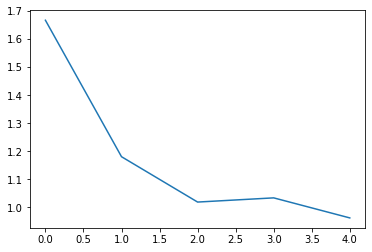

In [ ]:
plt.plot(range(epochs), costs)
print(costs)

In [ ]:
for layer in layers:
  print(layer.W.shape, layer.b.shape)

(32, 784) (32, 1)
(32, 32) (32, 1)
(32, 32) (32, 1)
(10, 32) (10, 1)
